In [32]:
import glob
import os
import re
from datetime import datetime
import pandas as pd
import h5py
import json
import numpy as np
from PIL import Image
from tqdm import tqdm

from scipy.stats import entropy
from skimage.filters import sobel
import cv2
import numpy as np
from scipy import stats
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from pathlib import Path

from MirrorFeatureExtractor.tools import extract_polygon_region_cv2

import matplotlib.pyplot as plt

from MirrorExtractor.mirror_extractor import MirrorExtractor
from MirrorFeatureExtractor.mirror_feature_extractor import MirrorFeatureExtractor

In [12]:
def get_texture_feat(gray_img):
    feat_extractor = MirrorFeatureExtractor()
    gray_norm = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    feat_dict = feat_extractor.extract_texture_features(gray_norm)
    return feat_dict

In [21]:
! ls /home/pgliwny/Praca/Computer_vision_for_MAGIC/data/

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
IR_cam_check_plots
crossings_points.pkl
crossings_points_IRCamM1T20250702_161000M.pkl
data
downolad_images.sh
grid_to_mirror.txt
images_description.txt
images_for_long_term_study
mirrors_dataset.h5
points_IRCam.json
webcam_useful_image
webcam_useful_images-20251017T172853Z-1-001.zip


In [30]:
img_list = sorted(glob.glob("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/*.jpg"))
img_list[:3]

['/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/IRCamM1T20250620_085000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/IRCamM1T20250620_124000M.jpg',
 '/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/IRCamM1T20250620_184000M.jpg']

In [13]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"
mirror_points_path = os.path.join(BASE_DIR, "data/points_IRCam.json")
img_path = os.path.join(BASE_DIR, "data/data/2025/12/15/IRCamM1T20251215_122547M.jpg")

with open(mirror_points_path, 'r') as f:
    data = json.load(f)

def get_point_coords(mirror_id):
    return data['mirror_ids'][f'id_{mirror_id:03d}']

In [14]:
points = get_point_coords(72)

for img_path in tqdm(img_list):
    img = Image.open(img_path)
    crop = extract_polygon_region_cv2(np.array(img), np.array(points))
    get_texture_feat(crop)

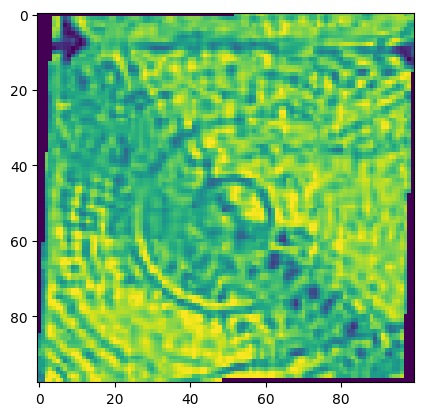

In [11]:
plt.imshow(crop)
plt.show()

In [17]:
get_texture_feat(crop)

{'lbp_mean': np.float64(4.704897959183674),
 'lbp_std': np.float64(2.6323064476777076),
 'lbp_entropy': np.float64(3.2461359655273965),
 'glcm_contrast': np.float64(1118.223459080602),
 'glcm_dissimilarity': np.float64(21.326118326118323),
 'glcm_homogeneity': np.float64(0.08515421530854422),
 'glcm_energy': np.float64(0.03166561441240556),
 'glcm_correlation': np.float64(0.7873198554844923)}

  4%|▍         | 2/45 [00:00<00:02, 14.74it/s]

IRCamM1T20250620_085000M
IRCamM1T20250620_124000M
IRCamM1T20250620_184000M
IRCamM1T20250627_085000M


 13%|█▎        | 6/45 [00:00<00:02, 16.74it/s]

IRCamM1T20250627_124000M
IRCamM1T20250627_180000M
IRCamM1T20250629_091000M
IRCamM1T20250705_085000M


 22%|██▏       | 10/45 [00:00<00:01, 17.58it/s]

IRCamM1T20250705_124000M
IRCamM1T20250705_173000M
IRCamM1T20250714_095000M
IRCamM1T20250714_122000M


 31%|███       | 14/45 [00:00<00:01, 17.31it/s]

IRCamM1T20250730_142000M
IRCamM1T20250730_183000M
IRCamM1T20250730_190000M
IRCamM1T20250905_090000M


 40%|████      | 18/45 [00:01<00:01, 18.12it/s]

IRCamM1T20250905_121000M
IRCamM1T20250905_175000M
IRCamM1T20250915_090000M
IRCamM1T20250915_123000M


 49%|████▉     | 22/45 [00:01<00:01, 17.72it/s]

IRCamM1T20250915_184000M
IRCamM1T20250930_124000M
IRCamM1T20250930_172000M
IRCamM1T20251005_072000M


 58%|█████▊    | 26/45 [00:01<00:01, 18.39it/s]

IRCamM1T20251005_135000M
IRCamM1T20251005_172000M
IRCamM1T20251012_074000M
IRCamM1T20251012_123000M
IRCamM1T20251012_183000M


 69%|██████▉   | 31/45 [00:01<00:00, 19.11it/s]

IRCamM1T20251022_080000M
IRCamM1T20251022_141000M
IRCamM1T20251022_184000M
IRCamM1T20251030_142000M
IRCamM1T20251030_184000M


 80%|████████  | 36/45 [00:01<00:00, 19.60it/s]

IRCamM1T20251108_081000M
IRCamM1T20251108_144000M
IRCamM1T20251108_182853M
IRCamM1T20251110_074000M
IRCamM1T20251110_152000M


 91%|█████████ | 41/45 [00:02<00:00, 19.54it/s]

IRCamM1T20251110_183000M
IRCamM1T20251130_082000M
IRCamM1T20251130_113000M
IRCamM1T20251217_081547M


100%|██████████| 45/45 [00:02<00:00, 18.44it/s]


IRCamM1T20251222_152503M
IRCamM1T20251222_182503M
=== Drift analysis (linear regression) ===
  no drift  lbp_mean                   slope/day=+0.0001  R²=0.0427  p=1.73e-01
  no drift  lbp_std                    slope/day=-0.0000  R²=0.0012  p=8.21e-01
  no drift  lbp_entropy                slope/day=-0.0000  R²=0.0147  p=4.28e-01
✓ DRIFT  glcm_contrast              slope/day=-1.9853  R²=0.2309  p=8.35e-04
✓ DRIFT  glcm_dissimilarity         slope/day=-0.0303  R²=0.2680  p=2.71e-04
✓ DRIFT  glcm_homogeneity           slope/day=+0.0002  R²=0.1546  p=7.54e-03
✓ DRIFT  glcm_energy                slope/day=+0.0000  R²=0.1792  p=3.76e-03
  no drift  glcm_correlation           slope/day=+0.0002  R²=0.0430  p=1.72e-01


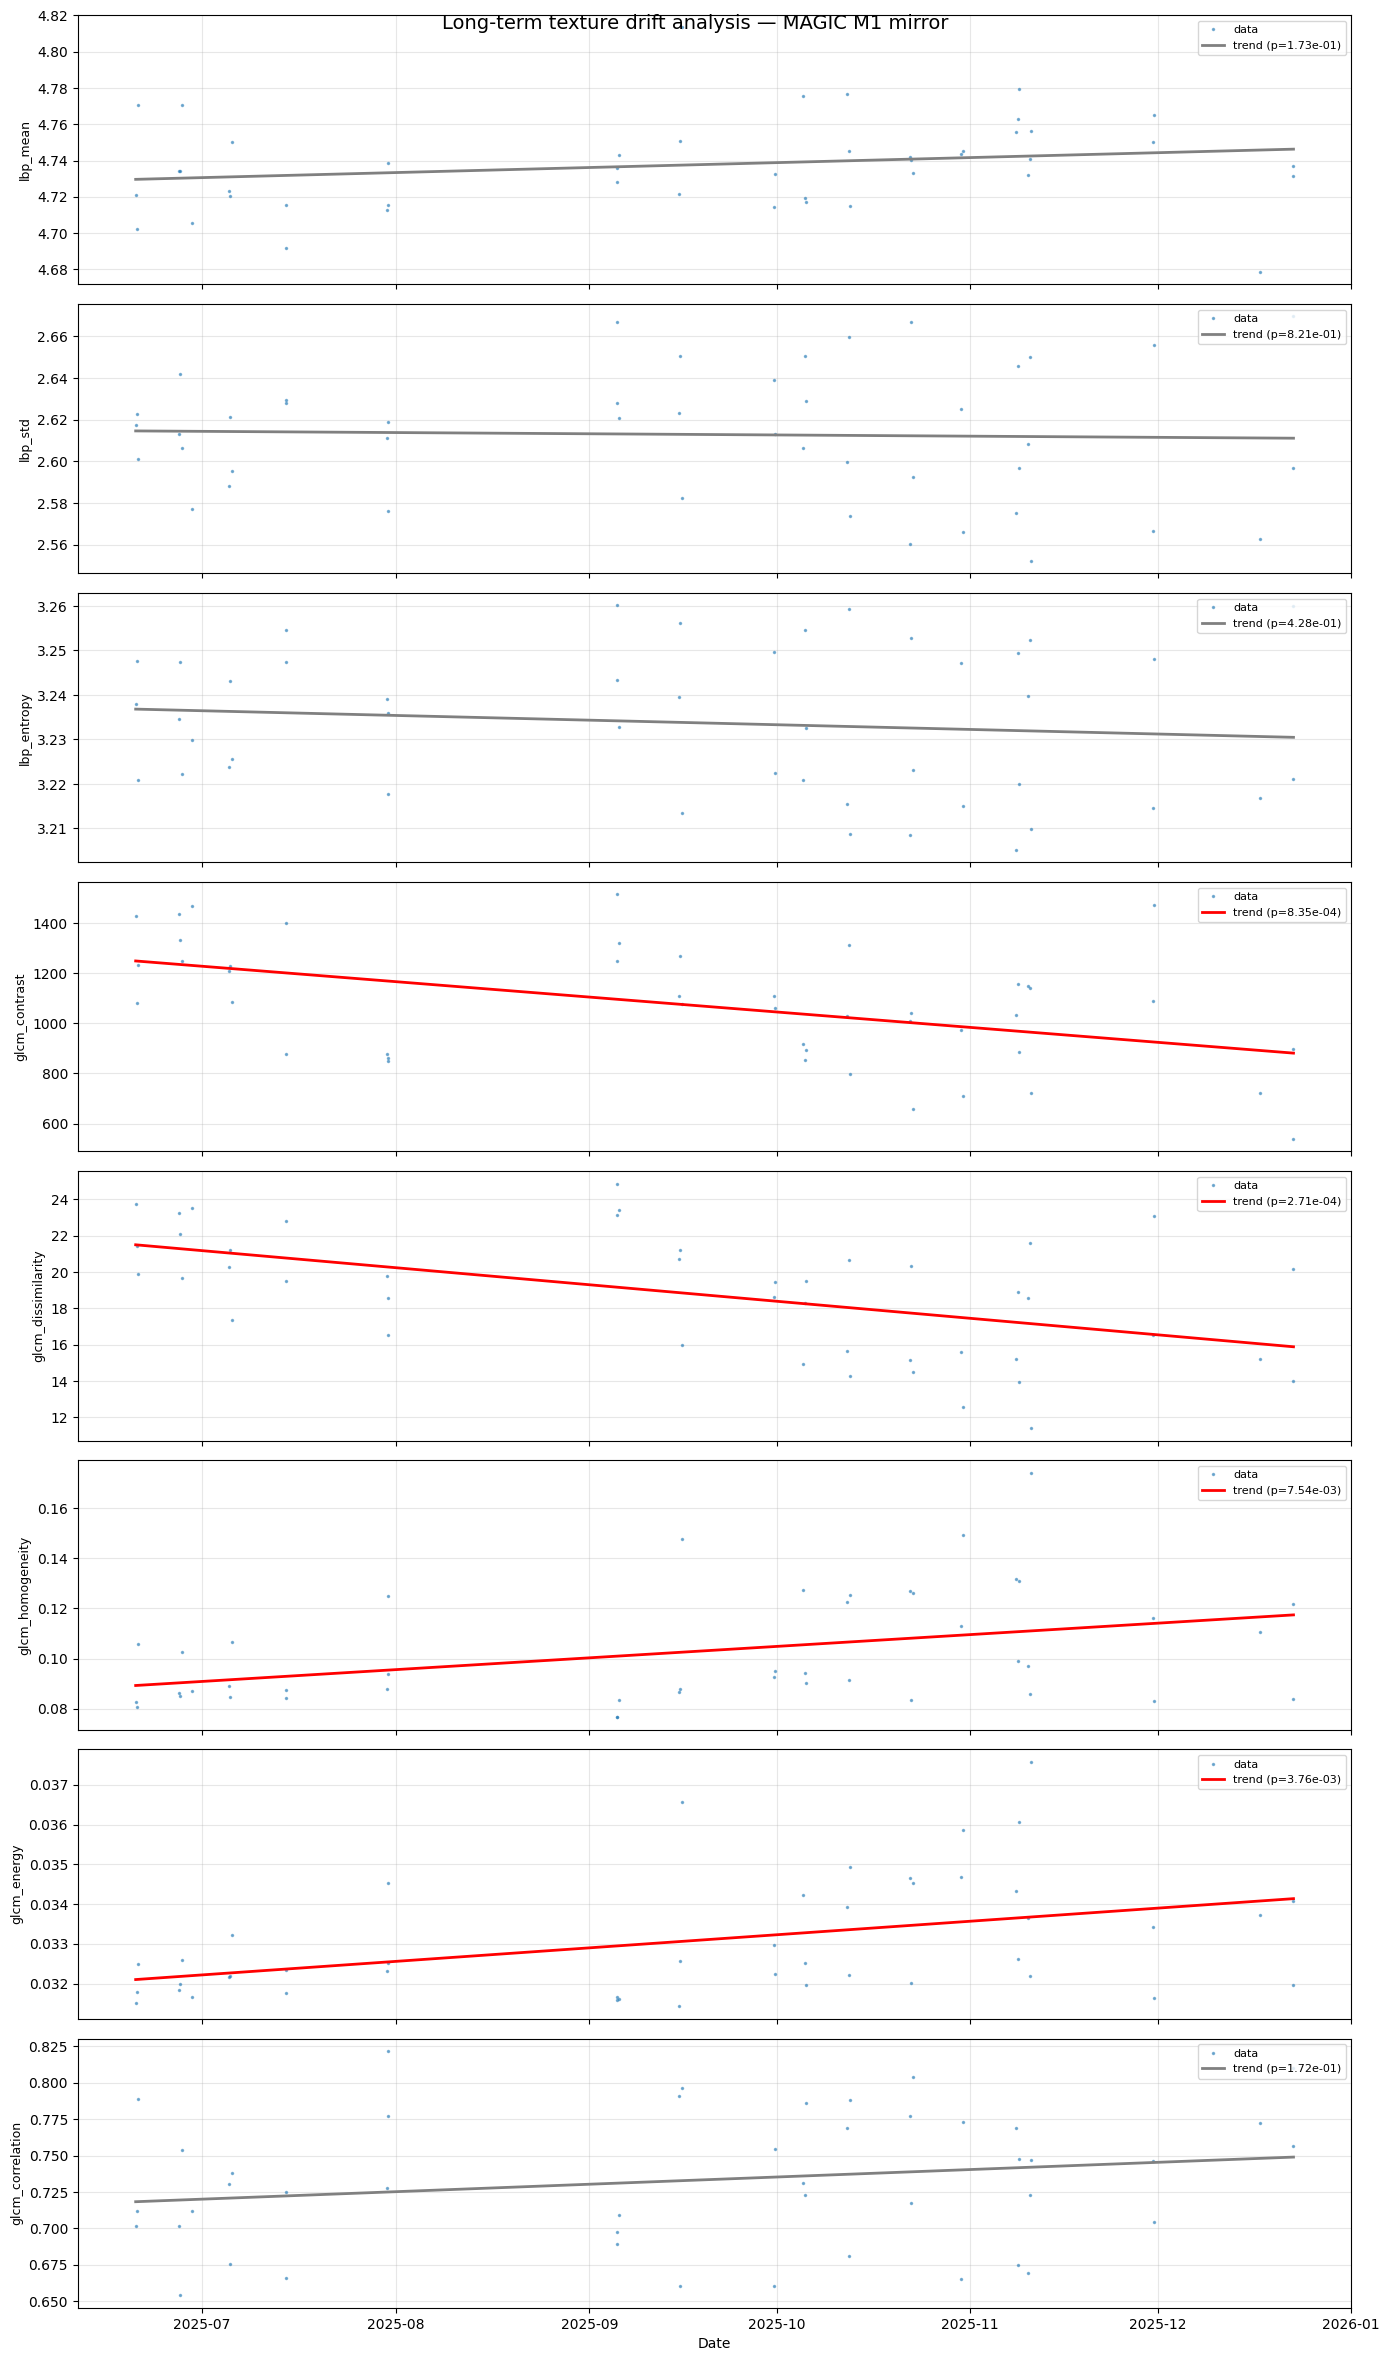

In [36]:
# --- Zbieranie danych ---
img_list = sorted(glob.glob("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/images_for_long_term_study/*.jpg"))
points = get_point_coords(72)

records = []
for img_path in tqdm(img_list):
    fname = Path(img_path).stem
    print(fname)
    timestamp = datetime.strptime(fname, "IRCamM1T%Y%m%d_%H%M%SM")

    img = Image.open(img_path)
    crop = extract_polygon_region_cv2(np.array(img), np.array(points))
    feat = get_texture_feat(crop)
    feat['timestamp'] = timestamp
    records.append(feat)

df = pd.DataFrame(records)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)
df['hours_since_start'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds() / 3600

feature_cols = [c for c in df.columns if c not in ('timestamp', 'hours_since_start')]

# --- Test na dryft: regresja liniowa per cecha ---
print("=== Drift analysis (linear regression) ===")
drift_results = {}
for col in feature_cols:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['hours_since_start'], df[col])
    drift_results[col] = {
        'slope_per_day': slope * 24,
        'r_squared': r_value**2,
        'p_value': p_value,
        'significant': p_value < 0.05
    }
    sig = "✓ DRIFT" if p_value < 0.05 else "  no drift"
    print(f"{sig}  {col:25s}  slope/day={slope*24:+.4f}  R²={r_value**2:.4f}  p={p_value:.2e}")

# --- Wykresy z trendem ---
fig, axes = plt.subplots(len(feature_cols), 1, figsize=(14, 3 * len(feature_cols)), sharex=True)
for ax, col in zip(axes, feature_cols):
    ax.plot(df['timestamp'], df[col], '.', markersize=3, alpha=0.5, label='data')

    # Linia trendu
    slope, intercept, r_value, p_value, _, = stats.linregress(df['hours_since_start'], df[col])
    trend_line = intercept + slope * df['hours_since_start']
    color = 'red' if p_value < 0.05 else 'gray'
    ax.plot(df['timestamp'], trend_line, '-', color=color, linewidth=2,
            label=f'trend (p={p_value:.2e})')

    ax.set_ylabel(col, fontsize=9)
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(True, alpha=0.3)

axes[-1].set_xlabel("Date")
fig.suptitle("Long-term texture drift analysis — MAGIC M1 mirror", fontsize=14)
plt.tight_layout()
plt.savefig("drift_analysis.png", dpi=150, bbox_inches='tight')
plt.show()

In [18]:
def mirror_quality_features(gray):
    """Cechy niezależne od treści odbicia"""
    gray_norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # 1. Ostrość krawędzi - defekty są ostre, odbicia rozmyte
    laplacian_var = cv2.Laplacian(gray_norm, cv2.CV_64F).var()
    
    # 2. Wysokie częstotliwości - defekty, nie odbicia
    f = np.fft.fft2(gray_norm)
    fshift = np.fft.fftshift(f)
    h, w = gray.shape
    cy, cx = h // 2, w // 2
    mask = np.zeros((h, w), bool)
    mask[cy-h//6:cy+h//6, cx-w//6:cx+w//6] = True  # niskie freq
    high_freq_ratio = np.sum(np.abs(fshift)[~mask]) / (np.sum(np.abs(fshift)) + 1e-6)
    
    # 3. Lokalna szorstkość (mean filter residual)
    blurred = cv2.blur(gray_norm.astype(float), (5, 5))
    roughness = np.std(gray_norm - blurred)
    
    # 4. Liczba lokalnych "pików" - potencjalne defekty punktowe
    local_max = cv2.dilate(gray_norm, np.ones((3,3), np.uint8))
    peaks = np.sum(gray_norm == local_max) / gray_norm.size
    
    return np.array([
        laplacian_var,     # ostrość
        high_freq_ratio,   # drobne detale
        roughness,         # szorstkość
        peaks              # punktowe anomalie
    ])

In [5]:
def get_dataset_info(h5_path):
    """Wyświetla informacje o datasecie."""
    with h5py.File(h5_path, 'r') as f:
        print(f"Dataset: {h5_path}")
        print(f"Utworzono: {f.attrs.get('created', 'N/A')}")
        print(f"Liczba luster: {f.attrs.get('num_mirrors', 'N/A')}")
        print("-" * 40)

        total_obs = 0
        for mirror_id in range(200):
            grp_path = f'mirrors/{mirror_id:03d}'
            if grp_path in f and 'images' in f[grp_path]:
                n = f[grp_path].attrs.get('num_observations', 0)
                total_obs += n

        print(f"Łączna liczba obserwacji: {total_obs}")

# Get all images of mirror selected by grid_id
def get_mirror_gray(h5_path, grid_id):
    with h5py.File(h5_path, "r") as file:
        print(file.keys())
        img_rgb_grid_id = np.array(file[f"mirrors/{grid_id}/images"])
        gray_images = np.dot(img_rgb_grid_id[..., :3], [0.299, 0.587, 0.114])
    return gray_images

In [20]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"
h5_output = os.path.join(BASE_DIR, "data/data/2025/mirrors_dataset_test2.h5")
img_gray_012 = get_mirror_gray(h5_output, "012")
print(img_gray_012.shape)        

<KeysViewHDF5 ['mirrors']>
(27, 83, 101)


In [48]:
with h5py.File(h5_output, "r") as file:
    print(file["mirrors/022"].keys())
    print(file["mirrors/022/source_files"][12])

<KeysViewHDF5 ['images', 'source_files']>
b'IRCamM1T20251130_164000M.jpg'


In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(12, 7))
ax[0].plot(quality_features_array[:, 0])
ax[1].plot(quality_features_array[:, 1])
ax[2].plot(quality_features_array[:, 2])
ax[3].plot(quality_features_array[:, 3])

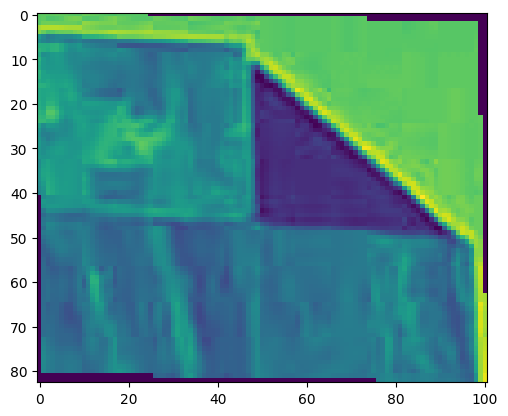

In [37]:
plt.imshow(img_gray_012[8, :, :])

In [34]:
img_gray_022 = get_mirror_gray(h5_output, "022")
print(img_gray_022.shape)        

<KeysViewHDF5 ['mirrors']>
(27, 86, 97)


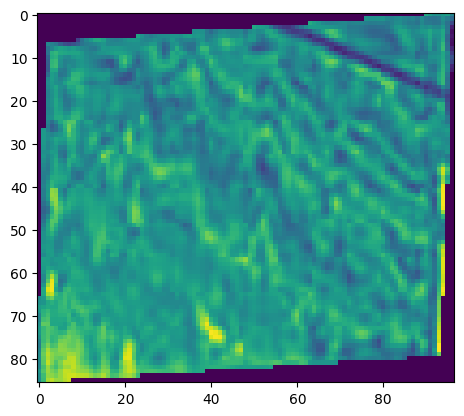

In [41]:
plt.imshow(img_gray_022[6, :, :])

In [38]:
quality_features_array = np.zeros((27, 4))
for i in range(0, 27):
    quality_features_array[i, :] = mirror_quality_features(img_gray_022[i, :, :])

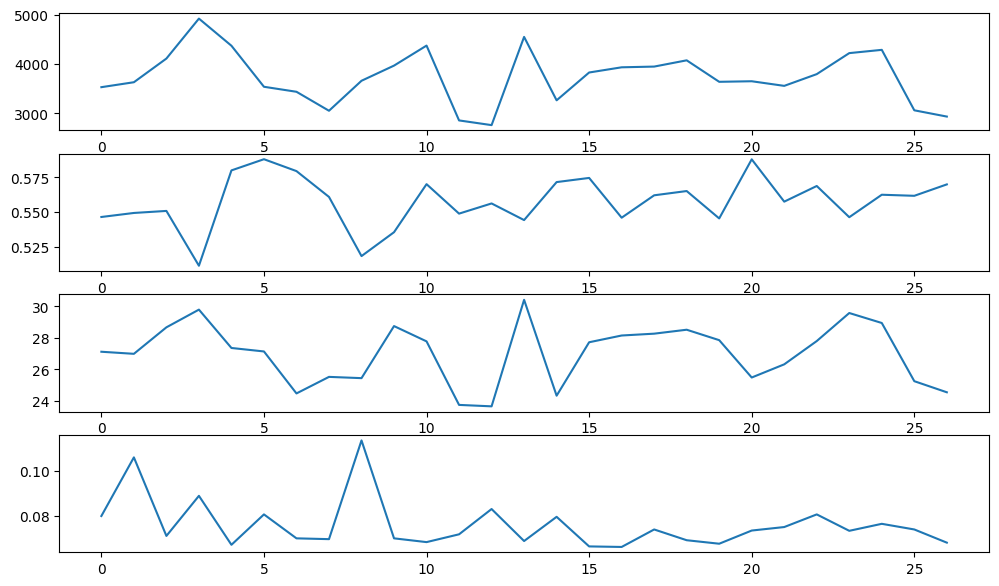

In [33]:
fig, ax = plt.subplots(4, 1, figsize=(12, 7))
ax[0].plot(quality_features_array[:, 0])
ax[1].plot(quality_features_array[:, 1])
ax[2].plot(quality_features_array[:, 2])
ax[3].plot(quality_features_array[:, 3])

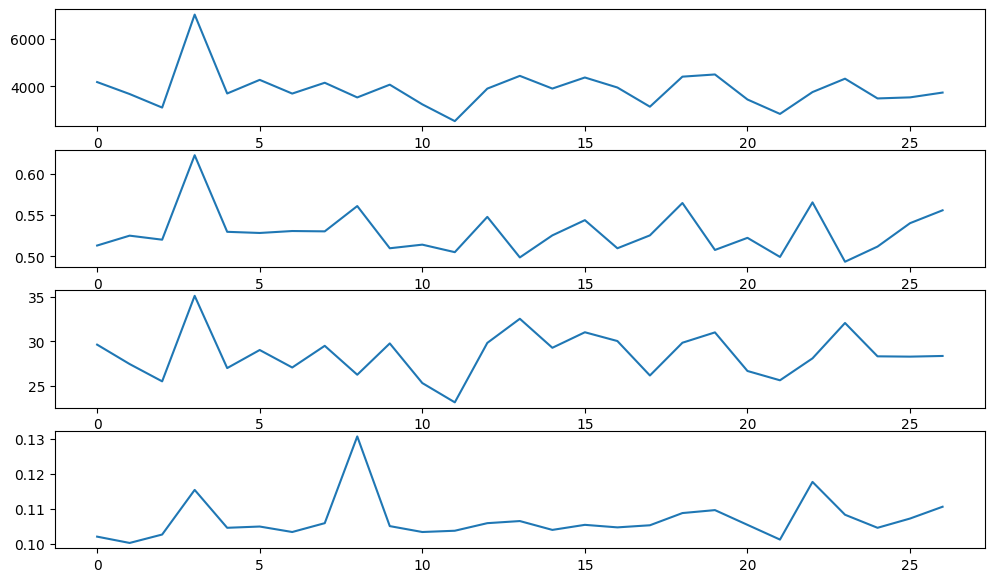

In [39]:
fig, ax = plt.subplots(4, 1, figsize=(12, 7))
ax[0].plot(quality_features_array[:, 0])
ax[1].plot(quality_features_array[:, 1])
ax[2].plot(quality_features_array[:, 2])
ax[3].plot(quality_features_array[:, 3])